# Rainfall Prediction - Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

there are 8425 rows and 23 columns in above dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

from above we are having object and float data type

# EDA

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


# from the above observastion:
    

Average rainfall of our data set is 2.8mm,
We have missing values in almost all the features,
All the features are continous data,
Seems we have outliers in Rainfall,Evaporation,WindGustSpeed.

In [6]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We have missing values in all the features, except date and location.

In [7]:
categorical_fetaures=[]
continous_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        categorical_fetaures.append(col)
    else:
        continous_features.append(col)  

In [8]:
for f in categorical_fetaures:
    print(f)
    print("===============================")
    print(df[f].value_counts())

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
WindDir9am
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
WindDir3pm
SE     813
S      742
SSE    623
WSW    5

In [9]:
for f in continous_features:
    print(f)
    print("===============================")
    print(df[f].value_counts())

MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
Evaporation
4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64
Sunshine
0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64
WindGustSpeed
39.0     441
35.0     435
37.0     422
33.0     408
31.0  

In [10]:
df['date']=pd.to_datetime(df['Date']).dt.day
df['month']=pd.to_datetime(df['Date']).dt.month
df['year']=pd.to_datetime(df['Date']).dt.year

In [11]:
df.drop(['Date'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

# Data Visualization

# Univariate Analysis

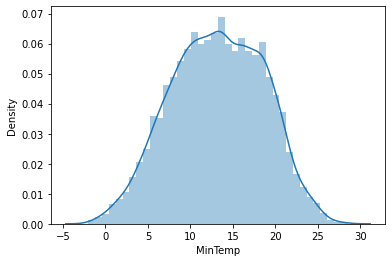

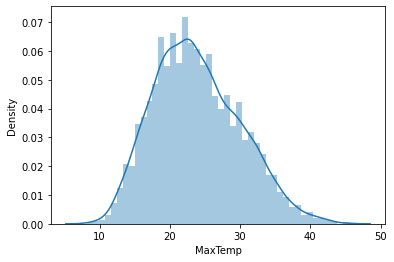

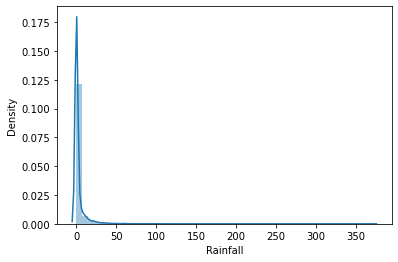

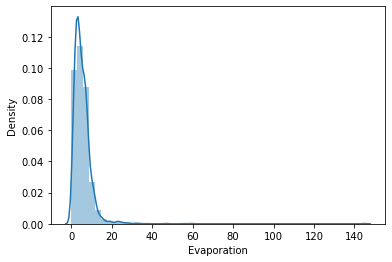

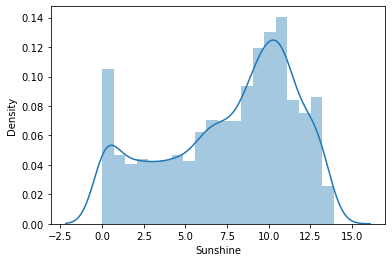

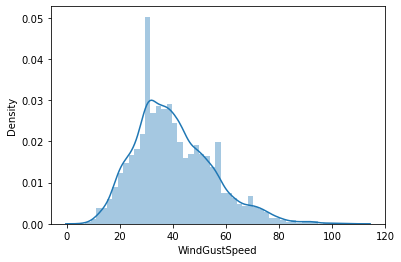

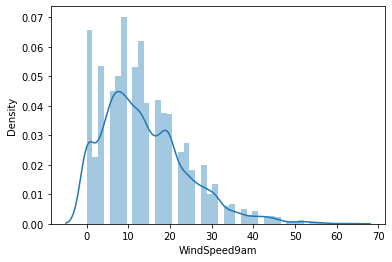

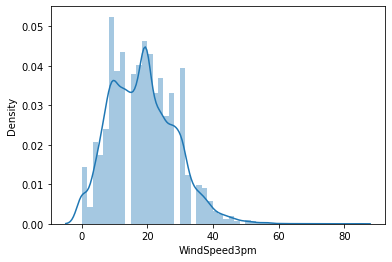

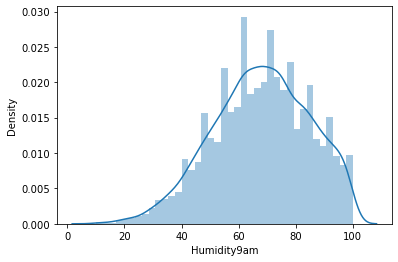

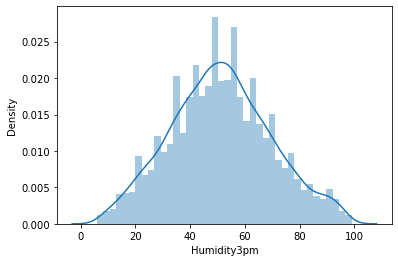

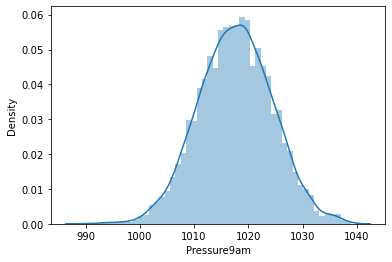

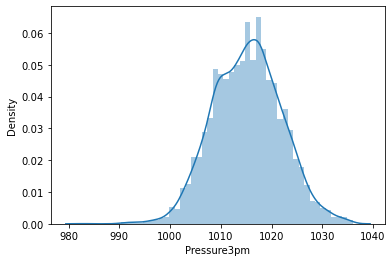

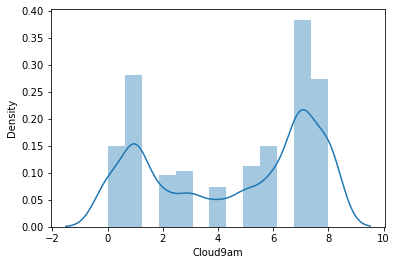

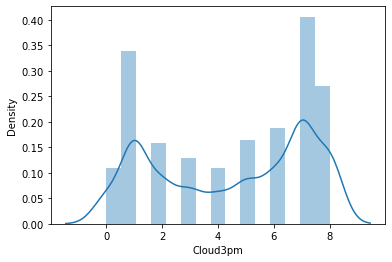

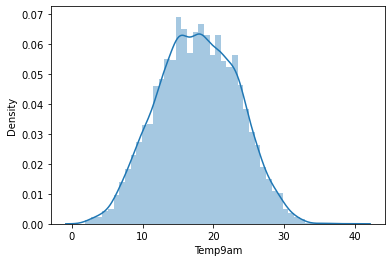

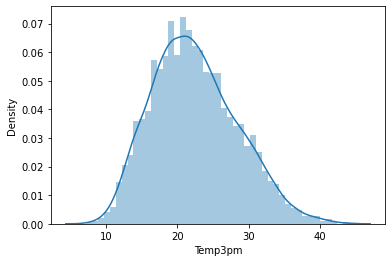

In [13]:
for col in continous_features:
    sns.distplot(df[col])
    plt.show()

From the above plot we can see that not all the features are normally distributed. We have skewness with the data.

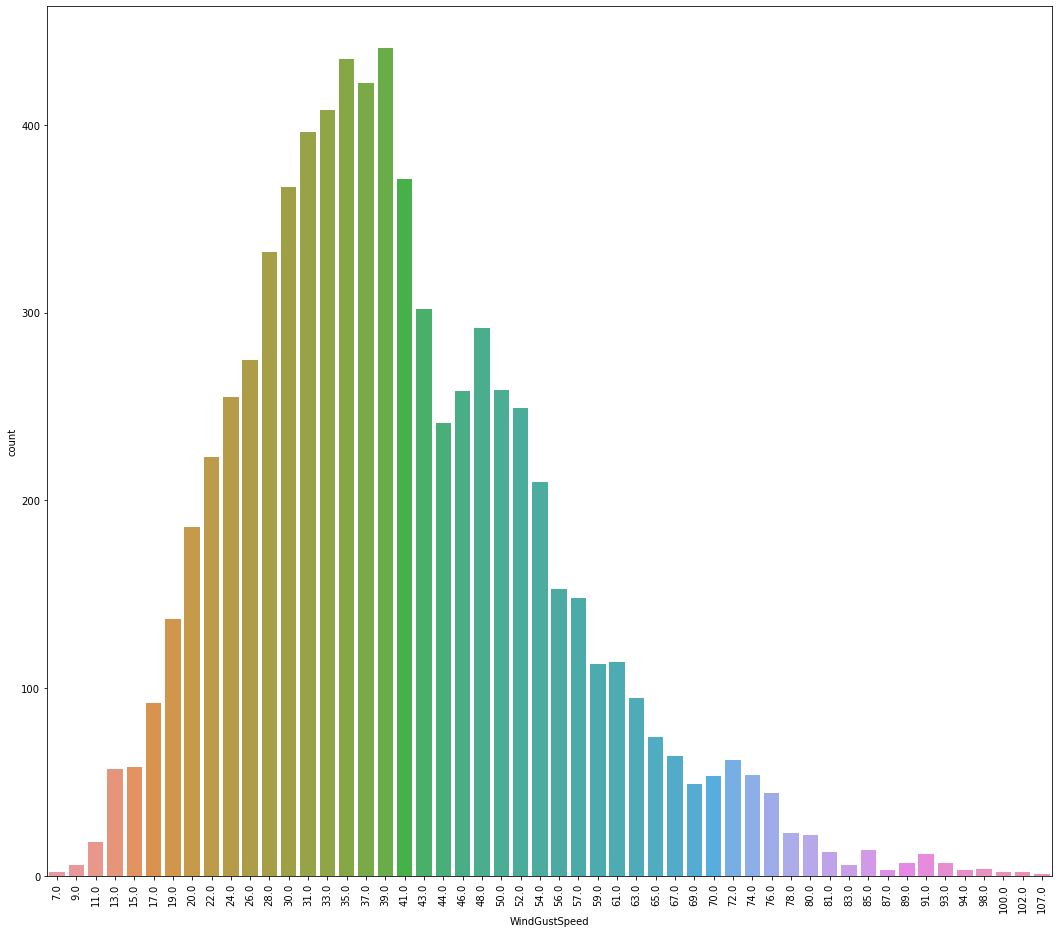

In [14]:
plt.figure(figsize=(18,16))
sns.countplot(df['WindGustSpeed'])
plt.xticks(rotation=90)
plt.show()

From the above plot we can see that, highest speed of WindGust is 107 and lowest speed is 7.
Most of the times, WindGust speed is at the range of 39. WindGust speed 107 is very rare..

# Bivariate Analysis

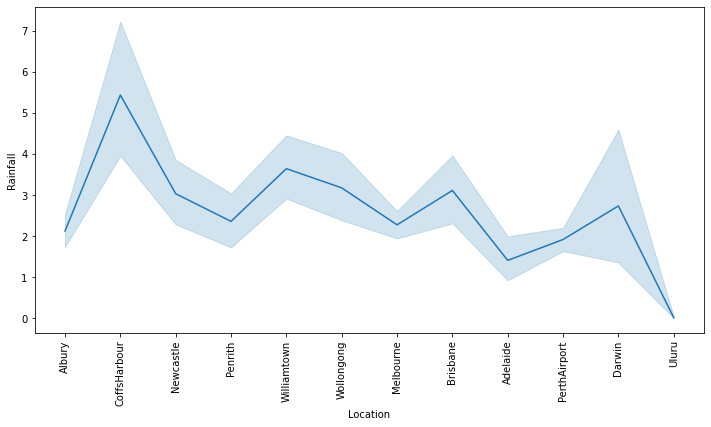

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(df['Location'],df['Rainfall'])
plt.show()

from the above We had high rainfall in the location of CoffsHarbour and low rainfall in Uluru.

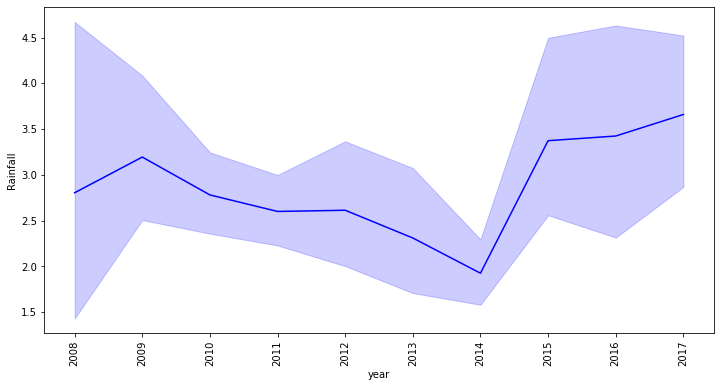

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.xticks(np.arange(2005,2020,1))
sns.lineplot(df['year'],df['Rainfall'],color='b')
plt.show()

from the above We had high rainfall in the year of 2017 and low rainfall in the year of 2014.

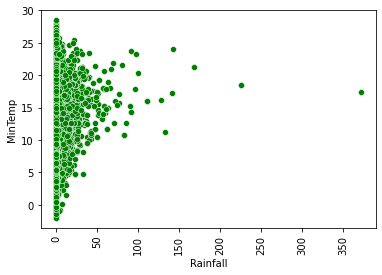

In [17]:
plt.xticks(rotation=90)
sns.scatterplot(df['Rainfall'],df['MinTemp'],color='g')
plt.show()

 from the above When the minimum temprature is getting increase, the rainfall rate is more.
We have outliers in rainfall.

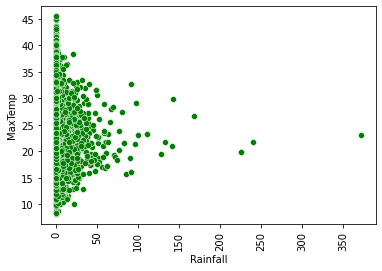

In [18]:
plt.xticks(rotation=90)
sns.scatterplot(df['Rainfall'],df['MaxTemp'],color='g')
plt.show()


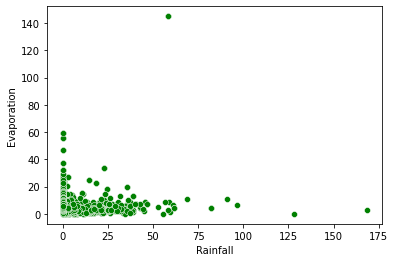

In [19]:
sns.scatterplot(df['Rainfall'],df['Evaporation'],color='g')
plt.show()

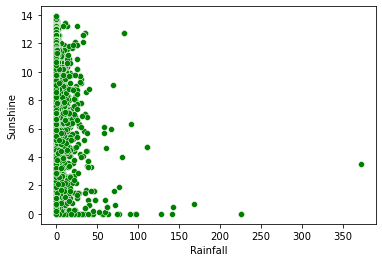

In [20]:
sns.scatterplot(df['Rainfall'],df['Sunshine'],color='g')
plt.show()

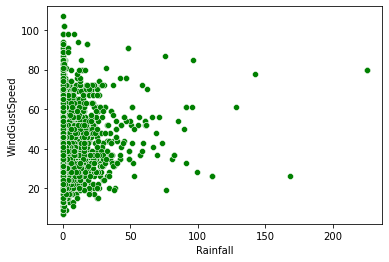

In [21]:
sns.scatterplot(df['Rainfall'],df['WindGustSpeed'],color='g')
plt.show()

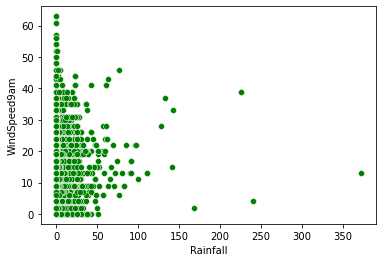

In [22]:
sns.scatterplot(df['Rainfall'],df['WindSpeed9am'],color='g')
plt.show()

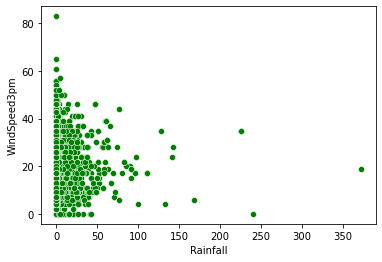

In [23]:
sns.scatterplot(df['Rainfall'],df['WindSpeed3pm'],color='g')
plt.show()

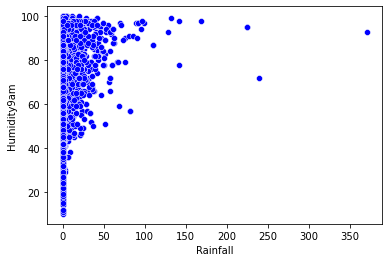

In [24]:
sns.scatterplot(df['Rainfall'],df['Humidity9am'],color='b')
plt.show()

From the above plot we can see that if the humidity level increases, the rainfall level increases.

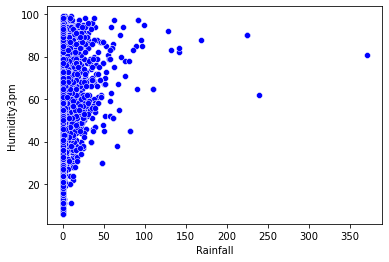

In [25]:
sns.scatterplot(df['Rainfall'],df['Humidity3pm'],color='b')
plt.show()

From the above plot we can see that if the humidity level increases, the rainfall level increases.

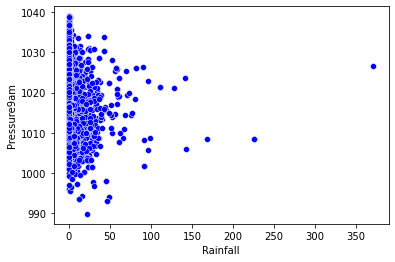

In [26]:
sns.scatterplot(df['Rainfall'],df['Pressure9am'],color='b')
plt.show()

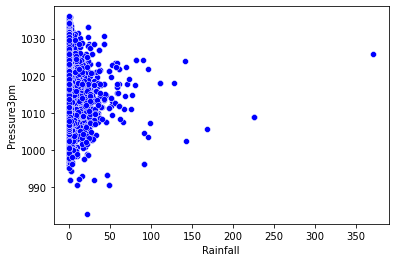

In [27]:
sns.scatterplot(df['Rainfall'],df['Pressure3pm'],color='b')
plt.show()

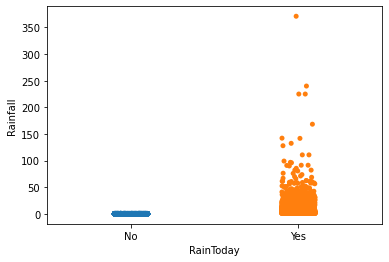

In [28]:
sns.stripplot(df['RainToday'],df['Rainfall'])
plt.show()

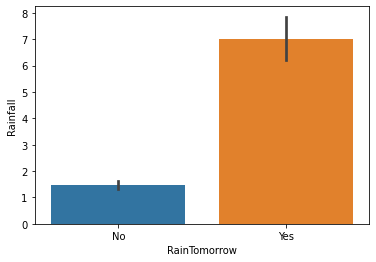

In [29]:
sns.barplot(df['RainTomorrow'],df['Rainfall'])
plt.show()

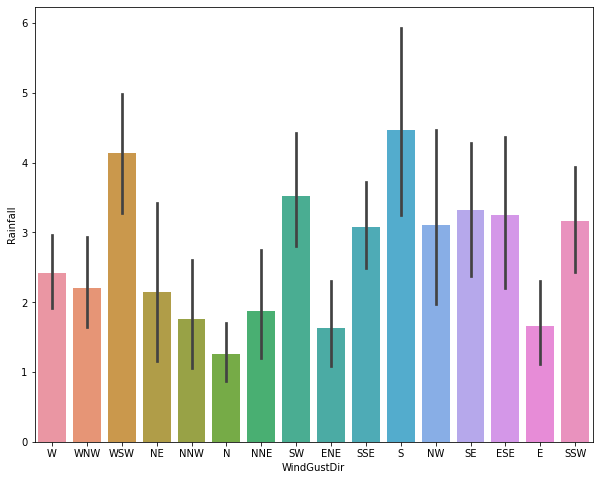

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(df['WindGustDir'],df['Rainfall'])
plt.show()

From the above plot we can observe that, when the WindGust direction is South, the rainfall level is high.
When the Wind gust direction is North, then the rainfall level is low.

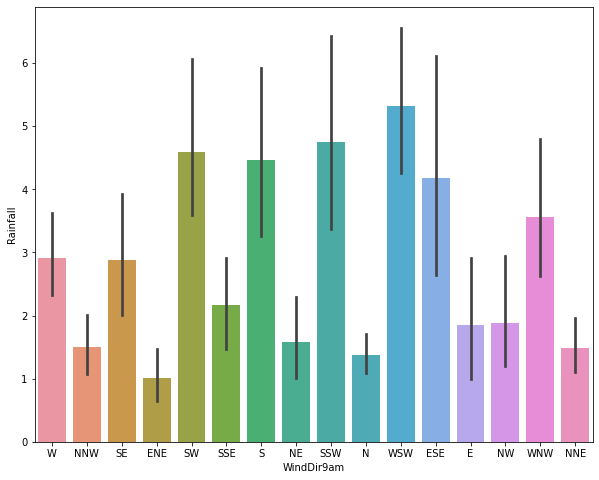

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(df['WindDir9am'],df['Rainfall'])
plt.show()

from the above plot we can see that when wind direction at 9am is WSW(WestSouthWest), then the rainfall is high.

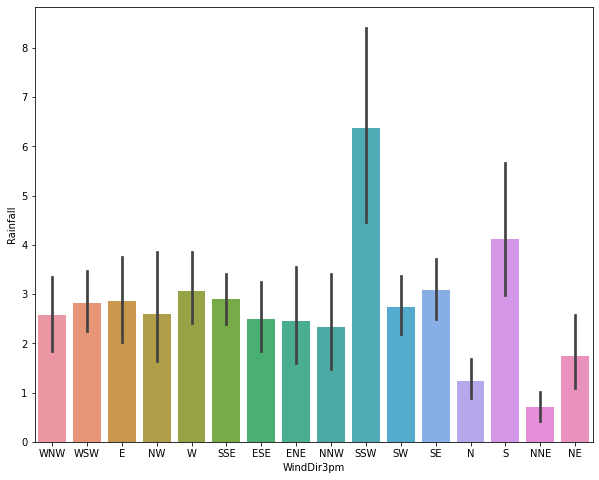

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(df['WindDir3pm'],df['Rainfall'])
plt.show()

From the  above plot we can see that when wind direction at 3pm is SSW(SouthSouthWest), then the rainfall is high.

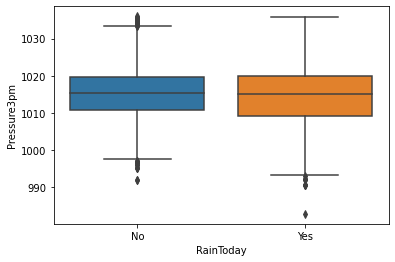

In [33]:
sns.boxplot(df['RainToday'],df['Pressure3pm'])
plt.show()

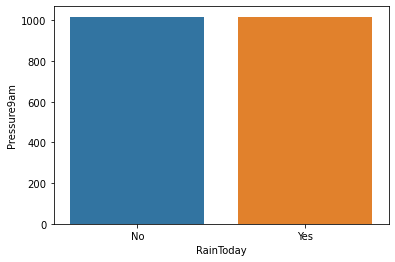

In [34]:
sns.barplot(df['RainToday'],df['Pressure9am'])
plt.show()

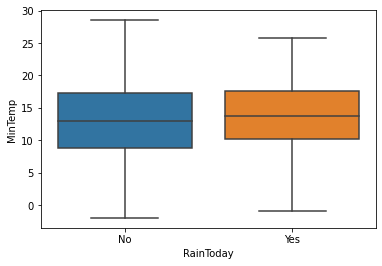

In [35]:
sns.boxplot(df['RainToday'],df['MinTemp'])
plt.show()

From the above plot, we can say, when its raining, the pressure in the air is little higher when its not raining.

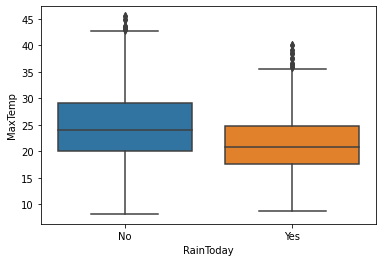

In [36]:
sns.boxplot(df['RainToday'],df['MaxTemp'])
plt.show()

From the above plot we can see that, when the maximum temprature is less when it is raining.

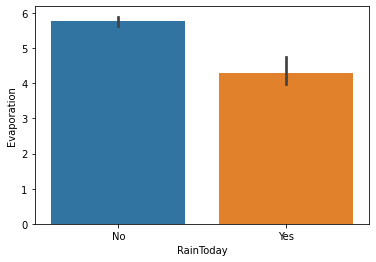

In [37]:
sns.barplot(df['RainToday'],df['Evaporation'])
plt.show()

From the above plot, it shows that, the evaporation level is less when it is raining.

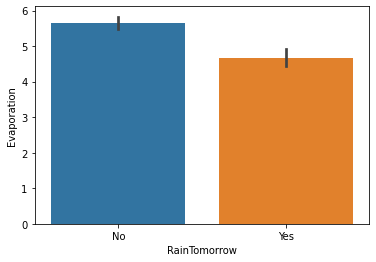

In [38]:
sns.barplot(df['RainTomorrow'],df['Evaporation'])
plt.show()

From the above plot we can see that,if its raining tomorrow, the evaporation level is less.

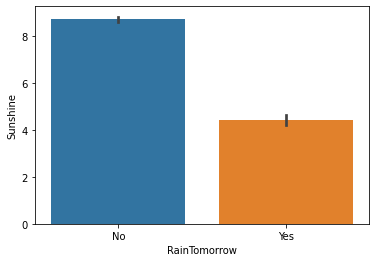

In [39]:
sns.barplot(df['RainTomorrow'],df['Sunshine'])
plt.show()

From the above plot it shows that, when sunshine level is less,mostly it will rain tomorrow.

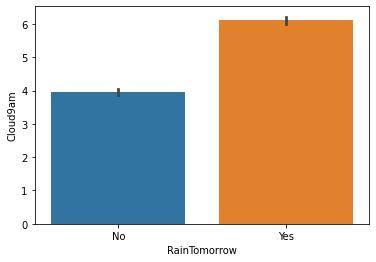

In [40]:
sns.barplot(df['RainTomorrow'],df['Cloud9am'])
plt.show()

From the above plot it shows that, when the cloud level at 9am is more, mostly it will rain tomorrow.

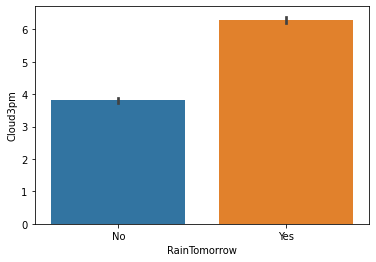

In [41]:
sns.barplot(df['RainTomorrow'],df['Cloud3pm'])
plt.show()

From the above plot it shows that, when the cloud level at 3pm is more, mostly it will rain tomorrow.

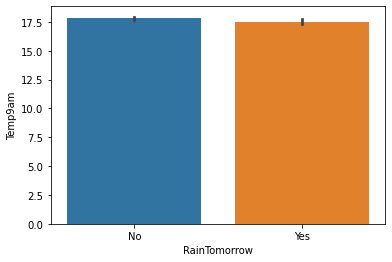

In [42]:
sns.barplot(df['RainTomorrow'],df['Temp9am'])
plt.show()

From the above plot, we could not see much difference in the temprature at 9am when it is raining tomorrow.

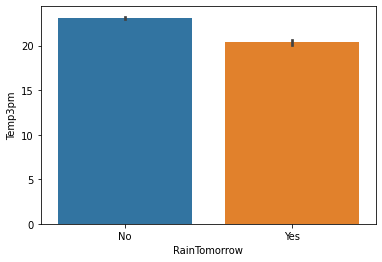

In [43]:
sns.barplot(df['RainTomorrow'],df['Temp3pm'])
plt.show()

From this plot we can observe that, when the temprature level is less at 3pm, then mostly it will rain tomorrow.

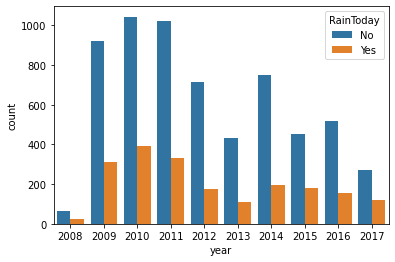

In [44]:
sns.countplot(df['year'],hue=df['RainToday'])
plt.show()

From the above plot we can see that, in the year of 2010, it was rained most of times.

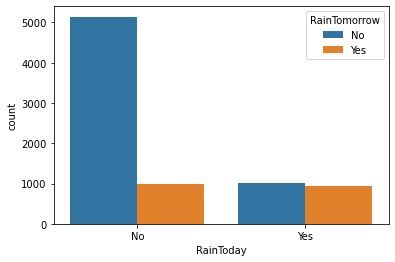

In [45]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])
plt.show()

From the above plot we can see if its raining today, then mostly it will rain tomorrow.

# Filling missing values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [47]:
df.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
date                0
month               0
year                0
dtype: int64

In [48]:
new_df=df.copy()

In [49]:
mean_values_features=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
mode_values_features=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [50]:
from sklearn.impute import SimpleImputer
for f in mean_values_features:
    new_df[f]=SimpleImputer(strategy='mean').fit_transform(new_df[[f]])

In [51]:
for f in mode_values_features:
    new_df[f]=SimpleImputer(strategy='most_frequent').fit_transform(new_df[[f]])

In [52]:
new_df.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall         240
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
date               0
month              0
year               0
dtype: int64

from the above Lets drop the rows with missing values in Rainfall as its our target varaibale.

In [53]:
print(new_df.shape)

(8425, 25)


In [54]:
new_df.dropna(inplace=True)

In [55]:
new_df.shape

(8185, 25)

# Encoding the non-numeric features.

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
enc_features=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for f in enc_features:
    new_df[f]=LabelEncoder().fit_transform(new_df[f])

# Checking MultiColinearity

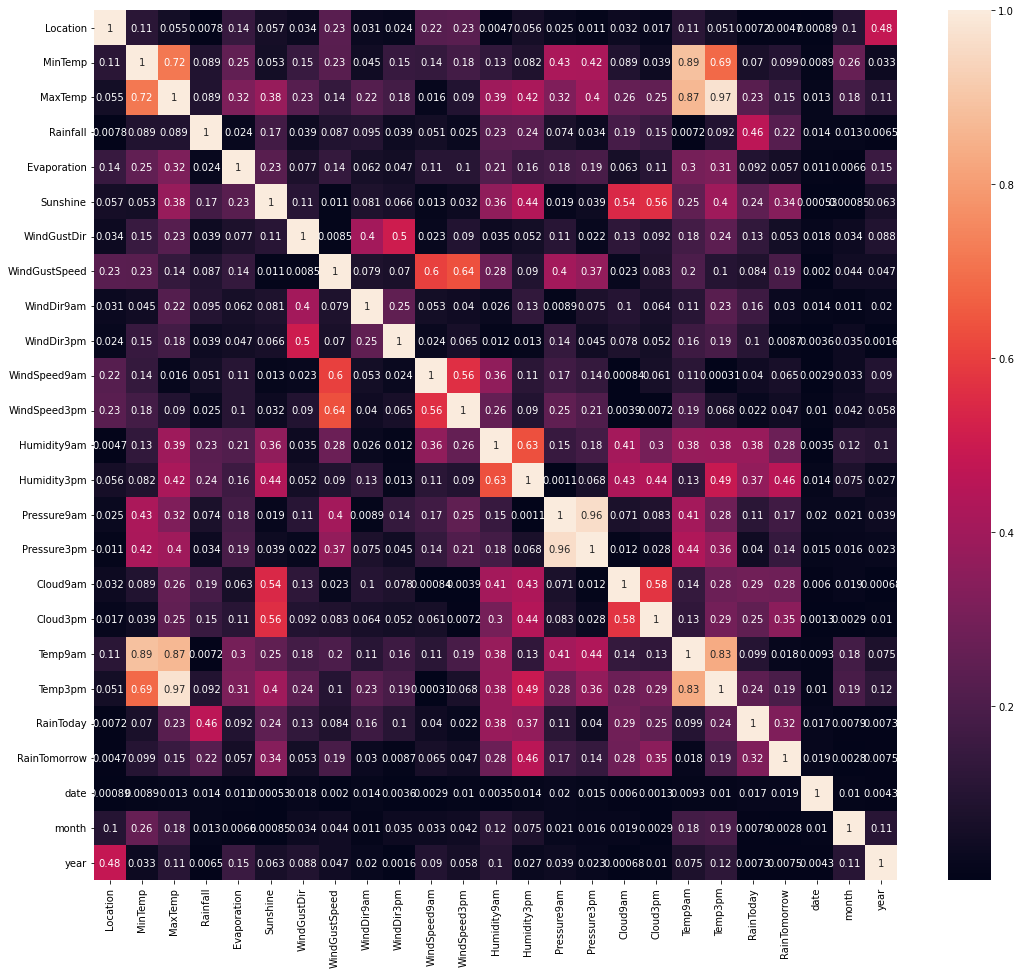

In [58]:
plt.figure(figsize=(18,16))
sns.heatmap(new_df.corr().abs(),annot=True)
plt.show()

observation:
    We could see strong relationship between Temp3pm and MaxTemp features.
Pressure3pm is 96% correlated with Pressure9am.
MinTemp is 89% correlated with Temp9am.
MaxTemp is 87% correlated with Temp9am.
Temp9am is 83% correlated with Temp3pm.

We will handle this multicolinearity problem by using VIF factor.

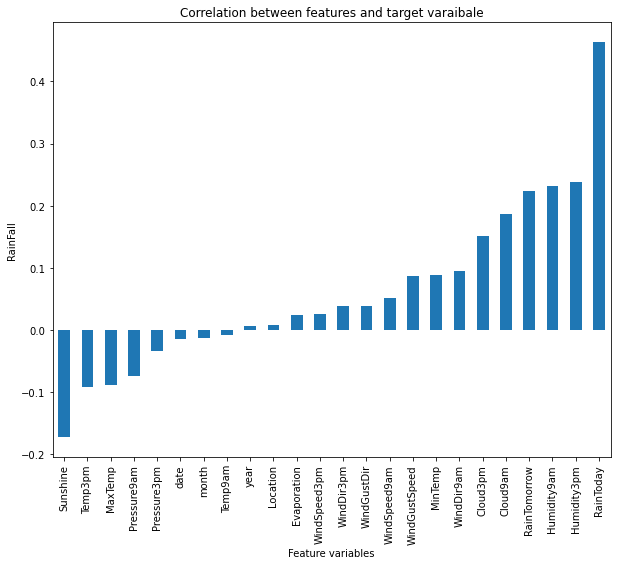

In [59]:
plt.figure(figsize=(10,8))
new_df.corr()['Rainfall'].sort_values().drop(['Rainfall']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('RainFall')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

from the above plot  we can see that feature year and location is having less correlation with the target variable Rainfall.

# Outliers removal

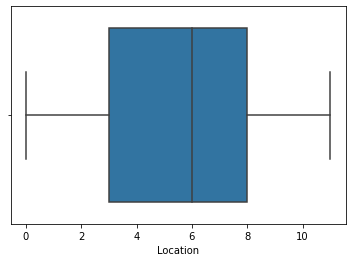

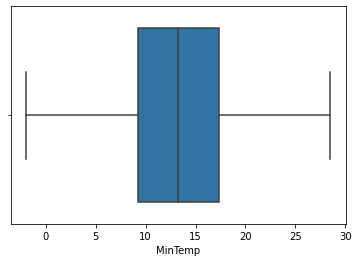

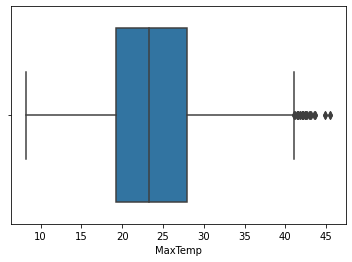

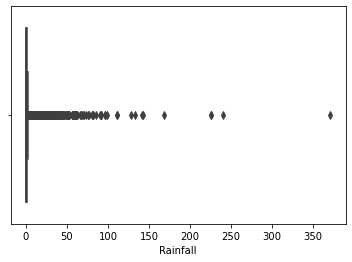

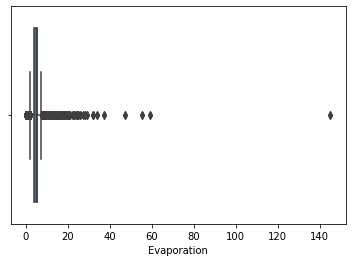

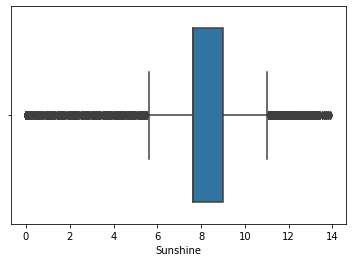

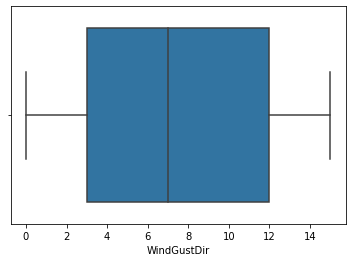

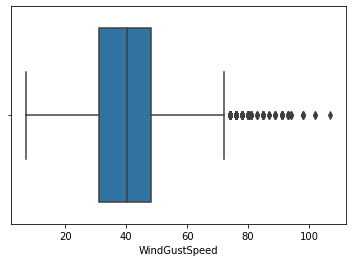

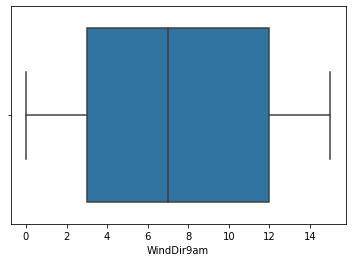

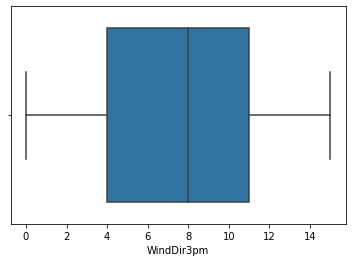

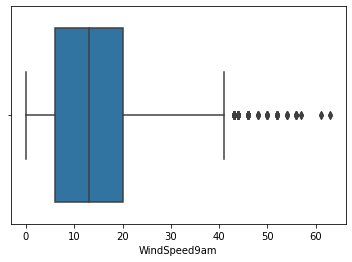

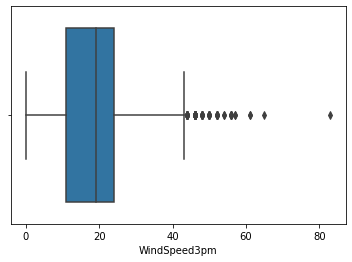

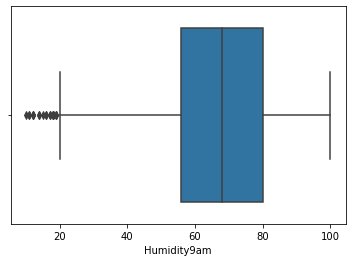

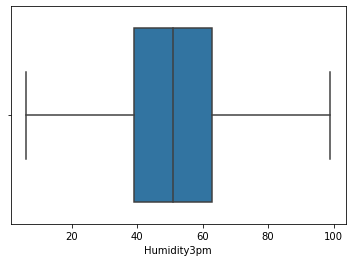

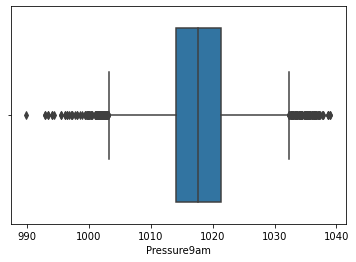

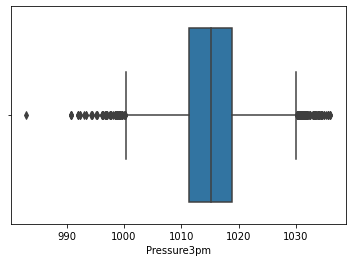

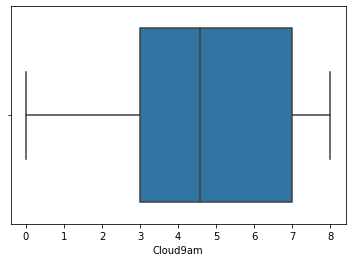

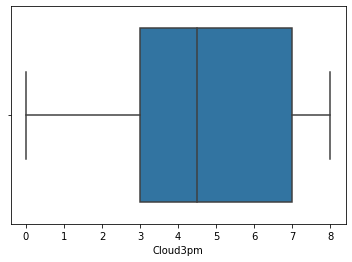

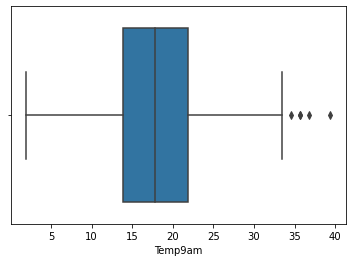

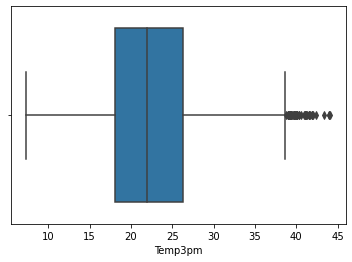

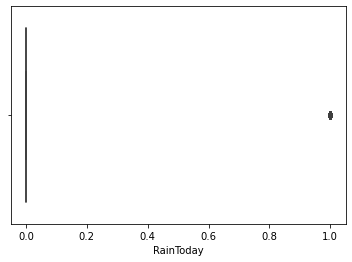

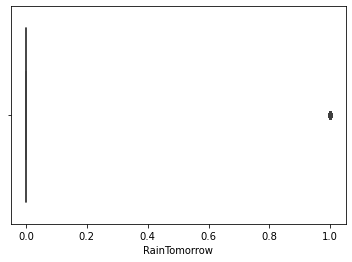

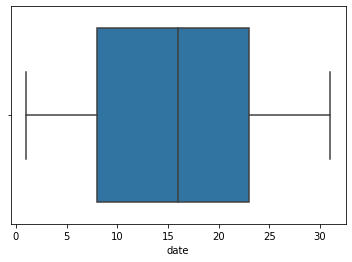

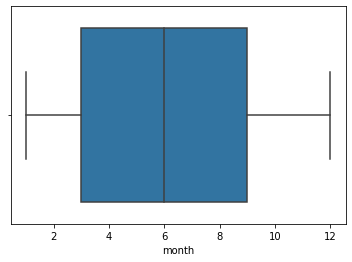

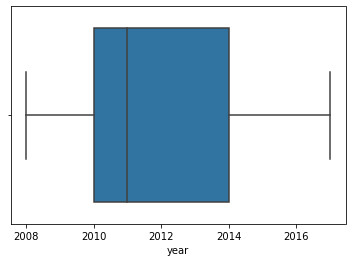

In [60]:
for col in new_df:
    sns.boxplot(new_df[col])
    plt.show()

from above As rainfall is our target variable, now not removing outliers from Rainfall.

In [61]:
outliers_fetures=['MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [62]:
from scipy.stats import zscore

In [63]:
score=zscore(new_df[outliers_fetures])
index=(score<3).all(axis=1)
new_df_cleaned=new_df[index]
print(new_df_cleaned.shape, new_df.shape)

(7897, 25) (8185, 25)


Data loss

In [64]:
data_loss=((new_df.shape[0]-new_df_cleaned.shape[0])/new_df.shape[0])*100
data_loss

3.518631643249847

from the above We lost 3.5% of data as part of outlier removal process.

# Checking Data Skewness

In [65]:
new_df_cleaned.skew().sort_values()

Sunshine         -0.726203
Cloud9am         -0.358231
Cloud3pm         -0.272807
Humidity9am      -0.264487
WindDir3pm       -0.122364
MinTemp          -0.082525
Pressure9am      -0.066436
Pressure3pm      -0.043897
Location         -0.035250
Temp9am          -0.028107
date              0.003500
month             0.064691
WindGustDir       0.117034
Humidity3pm       0.124110
WindDir9am        0.152979
WindSpeed3pm      0.312544
MaxTemp           0.324508
Temp3pm           0.337872
year              0.437632
WindGustSpeed     0.525316
WindSpeed9am      0.719546
Evaporation       0.862257
RainToday         1.182664
RainTomorrow      1.254230
Rainfall         13.302774
dtype: float64

We could see skewness in the continous features 'Sunshine','WindGustSpeed','WindSpeed9am','Evaporation','Rainfall'.

RainToday and RainTomorrow are the categorical features, hence we will not remove the skewness from those.

In [66]:
skewed_features=['Sunshine','WindGustSpeed','WindSpeed9am','Evaporation']

In [67]:
from sklearn.preprocessing import PowerTransformer

In [68]:
new_df_cleaned[skewed_features]=PowerTransformer().fit_transform(new_df_cleaned[skewed_features])

In [69]:
new_df_cleaned.skew().sort_values()

Cloud9am         -0.358231
Cloud3pm         -0.272807
Humidity9am      -0.264487
WindDir3pm       -0.122364
WindSpeed9am     -0.112405
MinTemp          -0.082525
Sunshine         -0.074149
Pressure9am      -0.066436
Pressure3pm      -0.043897
Location         -0.035250
Temp9am          -0.028107
WindGustSpeed     0.003369
date              0.003500
month             0.064691
Evaporation       0.076582
WindGustDir       0.117034
Humidity3pm       0.124110
WindDir9am        0.152979
WindSpeed3pm      0.312544
MaxTemp           0.324508
Temp3pm           0.337872
year              0.437632
RainToday         1.182664
RainTomorrow      1.254230
Rainfall         13.302774
dtype: float64

We still see skewness in the target variable Rainfall, lets apply one more transformation.

In [70]:
new_df_cleaned['Rainfall'].value_counts()

0.0      5088
0.2       390
0.4       176
0.6       115
1.2        82
         ... 
23.8        1
61.2        1
128.0       1
90.0        1
40.0        1
Name: Rainfall, Length: 245, dtype: int64

In [71]:
new_df_cleaned['Rainfall']=np.cbrt(new_df_cleaned['Rainfall'])

In [72]:
new_df_cleaned.skew().sort_values()

Cloud9am        -0.358231
Cloud3pm        -0.272807
Humidity9am     -0.264487
WindDir3pm      -0.122364
WindSpeed9am    -0.112405
MinTemp         -0.082525
Sunshine        -0.074149
Pressure9am     -0.066436
Pressure3pm     -0.043897
Location        -0.035250
Temp9am         -0.028107
WindGustSpeed    0.003369
date             0.003500
month            0.064691
Evaporation      0.076582
WindGustDir      0.117034
Humidity3pm      0.124110
WindDir9am       0.152979
WindSpeed3pm     0.312544
MaxTemp          0.324508
Temp3pm          0.337872
year             0.437632
RainToday        1.182664
RainTomorrow     1.254230
Rainfall         1.698175
dtype: float64

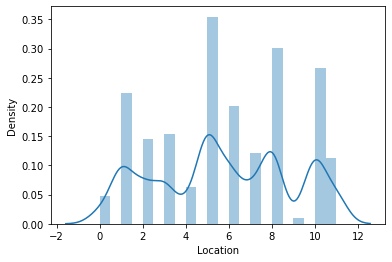

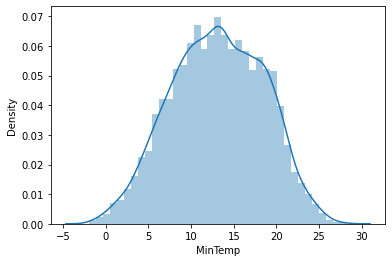

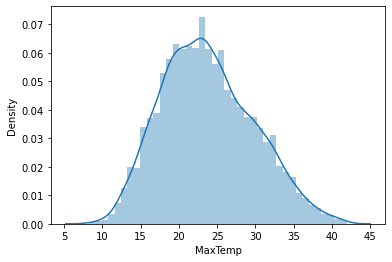

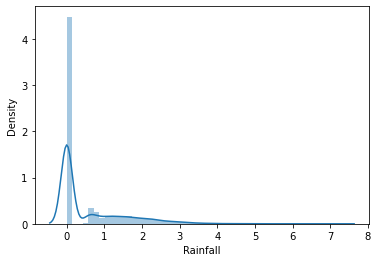

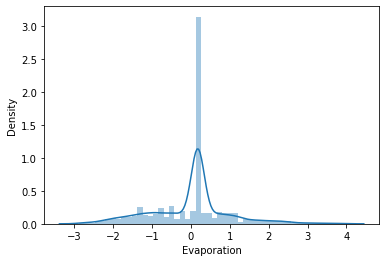

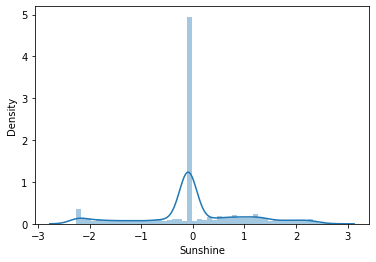

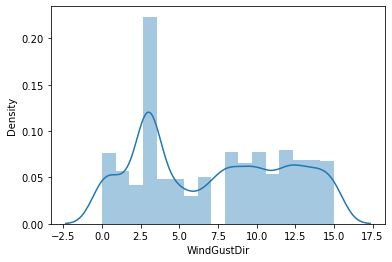

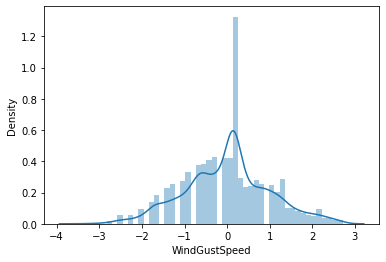

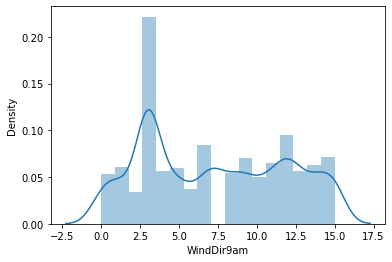

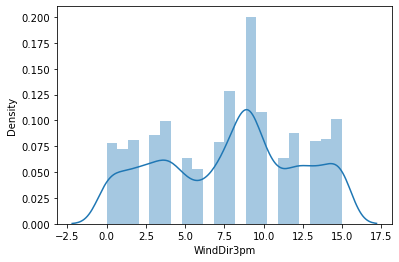

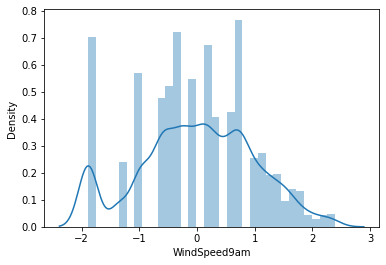

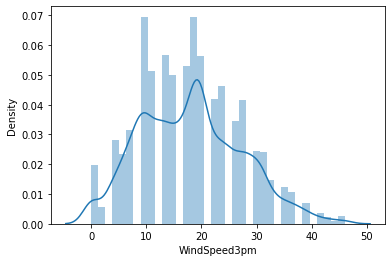

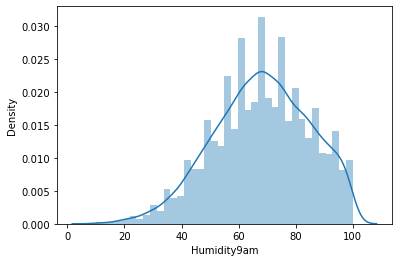

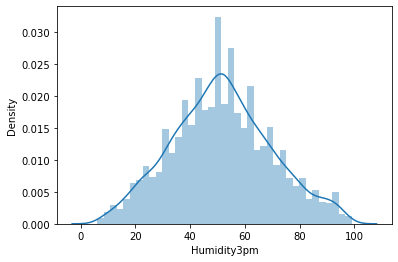

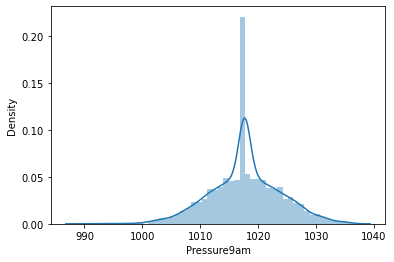

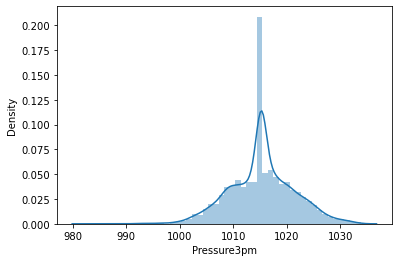

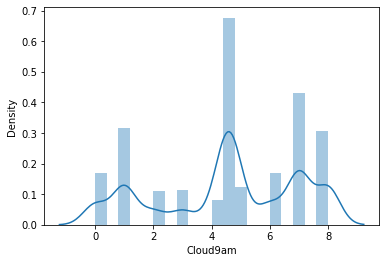

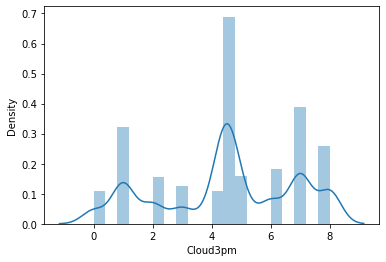

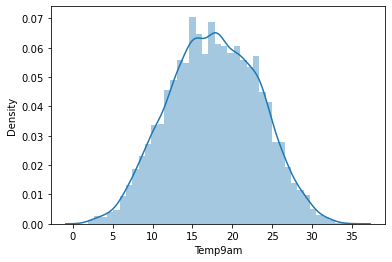

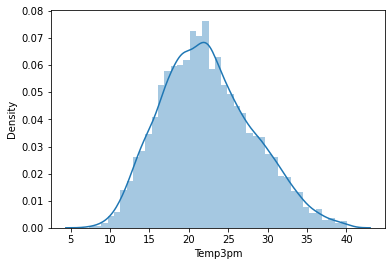

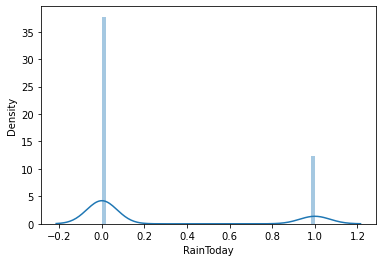

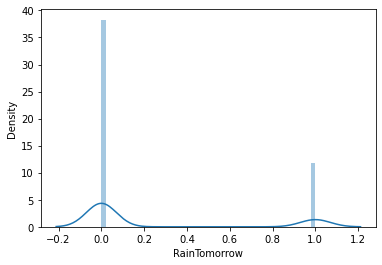

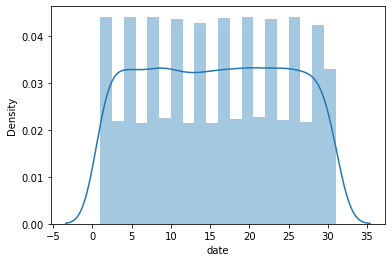

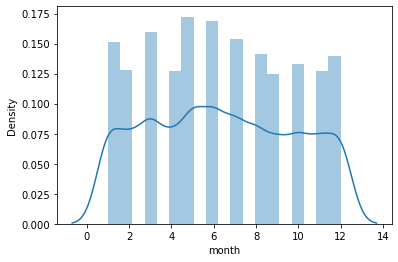

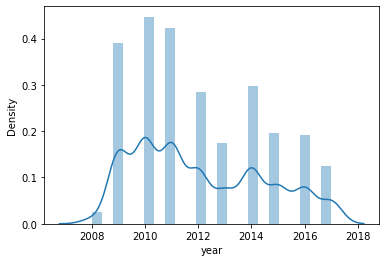

In [73]:
for col in new_df_cleaned.columns:
    sns.distplot(new_df_cleaned[col])
    plt.show()

# model building

# 1. Regression Problem- Predicting How much Rainfall

In [74]:
X=new_df_cleaned.drop(['Rainfall'],axis=1)
y=new_df_cleaned['Rainfall']

Applying standard scalar

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

# Lets Check Multicolinearity between the features using VIF

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
18,32.552285,Temp3pm
2,25.907651,MaxTemp
13,20.471910,Pressure9am
14,19.524436,Pressure3pm
17,17.556384,Temp9am
1,8.967881,MinTemp
12,5.779037,Humidity3pm
11,4.074293,Humidity9am
6,2.339256,WindGustSpeed
4,2.135272,Sunshine


In [79]:
X_sc.drop(['Temp3pm'],axis=1,inplace=True)

In [80]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
13,19.878509,Pressure9am
14,19.031205,Pressure3pm
17,16.273098,Temp9am
2,9.629502,MaxTemp
1,8.915933,MinTemp
12,3.994860,Humidity3pm
11,3.609635,Humidity9am
6,2.330008,WindGustSpeed
4,2.135272,Sunshine
10,1.993153,WindSpeed3pm


In [81]:
X_sc.drop(['Pressure9am'],axis=1,inplace=True)

In [82]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
16,16.215553,Temp9am
2,9.259660,MaxTemp
1,8.809773,MinTemp
12,3.994269,Humidity3pm
11,3.609078,Humidity9am
6,2.307481,WindGustSpeed
4,2.122467,Sunshine
14,1.987529,Cloud9am
10,1.980070,WindSpeed3pm
9,1.978335,WindSpeed9am


In [83]:
X_sc.drop(['Temp9am'],axis=1,inplace=True)

In [84]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
2,5.499828,MaxTemp
1,4.599706,MinTemp
12,3.205525,Humidity3pm
11,2.562127,Humidity9am
6,2.271541,WindGustSpeed
4,2.112832,Sunshine
14,1.966297,Cloud9am
9,1.956245,WindSpeed9am
10,1.934181,WindSpeed3pm
15,1.861623,Cloud3pm


We removed multi colinearity problem from the feature dataset and our data is ready to build the model.

In [85]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
import xgboost as xgb

In [86]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.818985315265396 Best RS:  165


In [87]:
 X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=165)

# Building base models and model selection

In [88]:
lr=LinearRegression()
rdg=Ridge()
rf_reg=RandomForestRegressor()
knn=KNeighborsRegressor()
dt_reg=DecisionTreeRegressor()
ad_reg=AdaBoostRegressor()
gb_reg=GradientBoostingRegressor()
xgb_reg=xgb.XGBRegressor()

In [89]:
models=[lr,rdg,rf_reg,knn,dt_reg,ad_reg,gb_reg,xgb_reg]
for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Train Accuracy: ",m.score(X_train,y_train))
    print("Test Accuracy: ",r2_score(y_test,y_pred))
    print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_test,y_pred)),'\n')

Metrics for  LinearRegression()
Train Accuracy:  0.7853961984403277
Test Accuracy:  0.818985315265396
Mean Absolute Error:  0.2524522353797559
Mean Squared Error:  0.14274703923204965
Root Mean Sqaured Error:  0.3778187915284914 

Metrics for  Ridge()
Train Accuracy:  0.7853961759132707
Test Accuracy:  0.8189844045317772
Mean Absolute Error:  0.2524698115741699
Mean Squared Error:  0.14274775743083998
Root Mean Sqaured Error:  0.3778197419813316 

Metrics for  RandomForestRegressor()
Train Accuracy:  0.9783035178269321
Test Accuracy:  0.8710364753453259
Mean Absolute Error:  0.19346645884745128
Mean Squared Error:  0.10169982253304419
Root Mean Sqaured Error:  0.31890409613713677 

Metrics for  KNeighborsRegressor()
Train Accuracy:  0.8302312393363366
Test Accuracy:  0.7774021222115142
Mean Absolute Error:  0.24669997924951081
Mean Squared Error:  0.17553928312629113
Root Mean Sqaured Error:  0.41897408407476844 

Metrics for  DecisionTreeRegressor()
Train Accuracy:  1.0
Test Accuracy:

In [90]:
for m in models:
    print("Cross validation score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross validation score for  LinearRegression() 0.7904513309091259
Cross validation score for  Ridge() 0.7904507049879125
Cross validation score for  RandomForestRegressor() 0.8281752384992975
Cross validation score for  KNeighborsRegressor() 0.7450454061977181
Cross validation score for  DecisionTreeRegressor() 0.6561315096993379
Cross validation score for  AdaBoostRegressor() 0.7541290673362927
Cross validation score for  GradientBoostingRegressor() 0.8090511855302649
Cross validation score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
  

# Based on base model score and cross validation score and RMSE value, RandomForestRegressor works well for our data set.

# Final model - RandomForestRegressor

# Hyper Parameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[100,130,150]}
grd_srch=GridSearchCV(RandomForestRegressor(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)

RandomForestRegressor(n_estimators=150)


In [92]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=RandomForestRegressor(n_estimators=150,random_state=i)
    final_model.fit(X_train,y_train)
    y_pred=final_model.predict(X_test)
    acc=r2_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.8728855036381029 Best RS:  10


In [93]:
final_model=RandomForestRegressor(n_estimators=150,random_state=10)
final_model.fit(X_train,y_train)
y_pred=final_model.predict(X_test)
print("Train Accuracy: ",final_model.score(X_train,y_train))
print("Test Accuracy: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Train Accuracy:  0.9789438415121116
Test Accuracy:  0.8728855036381029
Mean Absolute Error:  0.19311558566809456
Mean Squared Error:  0.1002416904779725
Root Mean Sqaured Error:  0.31660968159229197


from the above final model with 87% of test accuracy and 0.3 RMSE

# Saving final model

In [94]:
import pickle
pickle.dump(final_model,open('RainfallPrediction_reg.pkl','wb'))

loading the saved model

In [95]:
model=pickle.load(open('RainfallPrediction_reg.pkl','rb'))

Predicting the test values

In [96]:
prediction=model.predict(X_test)
result=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result

,Actual,Predicted
1981,0.793701,0.073872
6131,0.843433,0.614503
6301,0.000000,0.013723
2122,2.432881,2.019763
8290,0.000000,0.000000
...,...,...
627,1.259921,1.827284
4031,2.048800,1.933436
3567,0.000000,0.062765
3311,0.928318,0.542770


# 2. Classification Problem - Predicting RainTomorrow

Filling missing values

In [97]:
df.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
date                0
month               0
year                0
dtype: int64

In [98]:
new_df_clf=df.copy()

In [99]:
mean_values_features=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
mode_values_features=['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [100]:
from sklearn.impute import SimpleImputer
for f in mean_values_features:
    new_df_clf[f]=SimpleImputer(strategy='mean').fit_transform(new_df_clf[[f]])

In [101]:
for f in mode_values_features:
    new_df_clf[f]=SimpleImputer(strategy='most_frequent').fit_transform(new_df_clf[[f]])

In [102]:
new_df_clf.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     239
date               0
month              0
year               0
dtype: int64

In [103]:
new_df_clf.dropna(inplace=True)

In [104]:
new_df_clf.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
month            0
year             0
dtype: int64

In [105]:
new_df_clf.shape

(8186, 25)

# Endoing non-numeric features

In [106]:
enc_features=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for f in enc_features:
    new_df_clf[f]=LabelEncoder().fit_transform(new_df_clf[f])

In [107]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7897 non-null   int32  
 1   MinTemp        7897 non-null   float64
 2   MaxTemp        7897 non-null   float64
 3   Rainfall       7897 non-null   float64
 4   Evaporation    7897 non-null   float64
 5   Sunshine       7897 non-null   float64
 6   WindGustDir    7897 non-null   int32  
 7   WindGustSpeed  7897 non-null   float64
 8   WindDir9am     7897 non-null   int32  
 9   WindDir3pm     7897 non-null   int32  
 10  WindSpeed9am   7897 non-null   float64
 11  WindSpeed3pm   7897 non-null   float64
 12  Humidity9am    7897 non-null   float64
 13  Humidity3pm    7897 non-null   float64
 14  Pressure9am    7897 non-null   float64
 15  Pressure3pm    7897 non-null   float64
 16  Cloud9am       7897 non-null   float64
 17  Cloud3pm       7897 non-null   float64
 18  Temp9am 

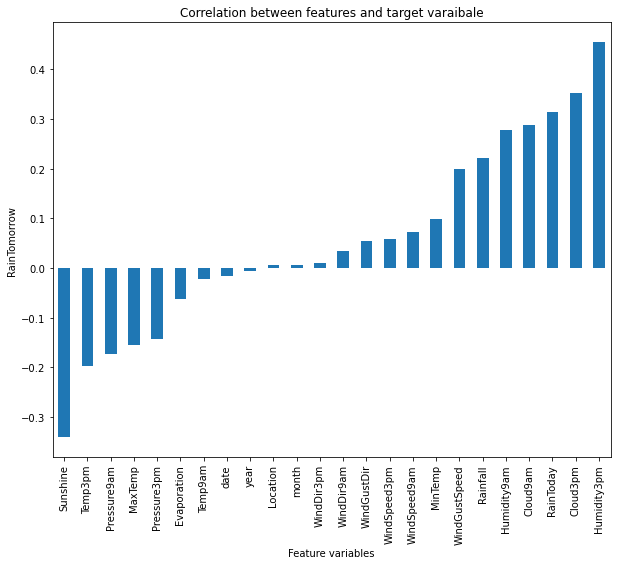

In [108]:
plt.figure(figsize=(10,8))
new_df_clf.corr()['RainTomorrow'].sort_values().drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

From the above plot we can see year,month and location has very less correlation with the target variable.

# Outliers Removal

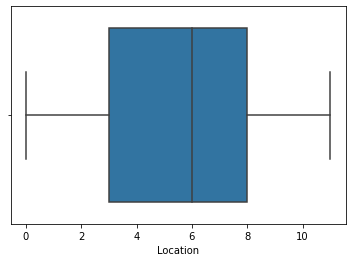

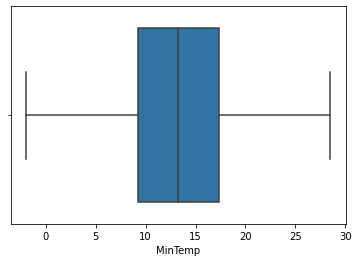

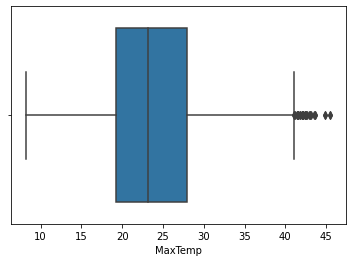

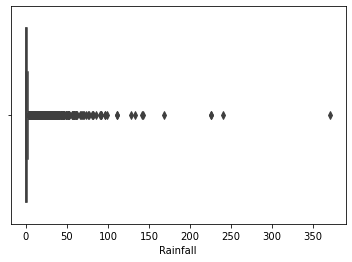

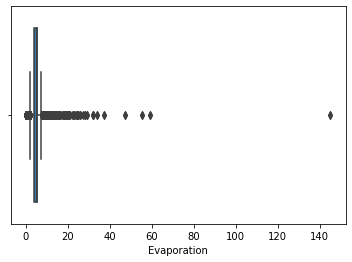

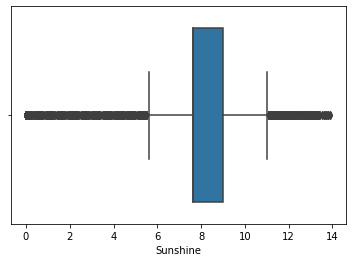

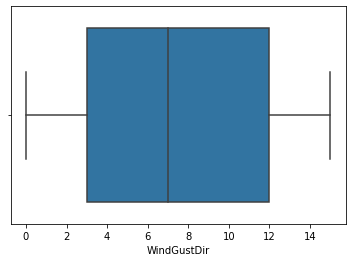

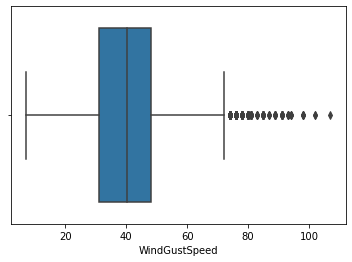

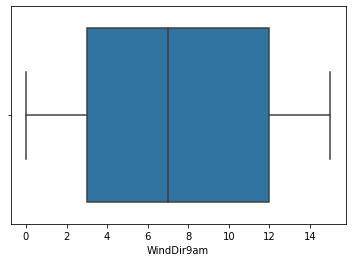

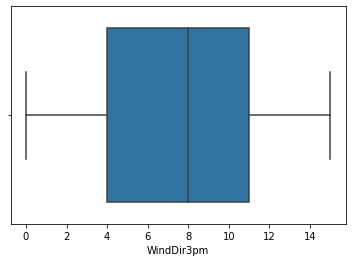

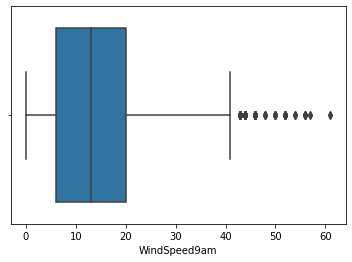

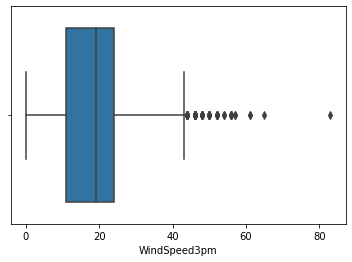

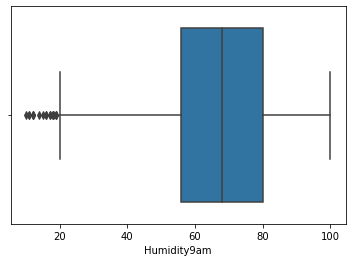

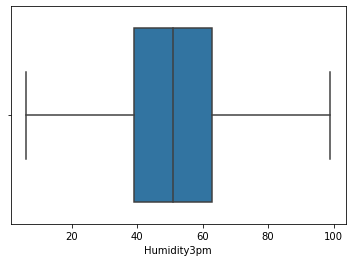

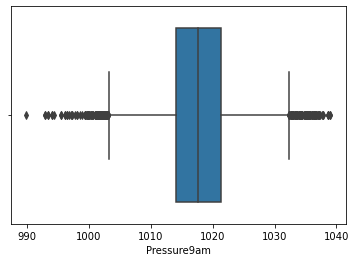

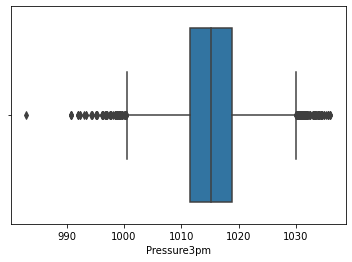

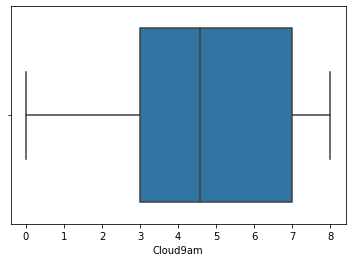

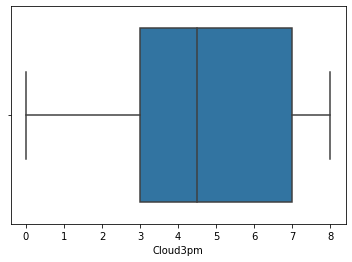

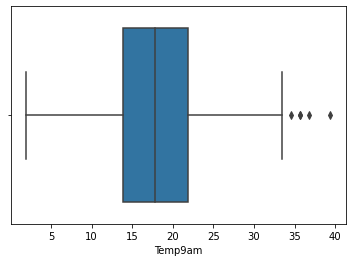

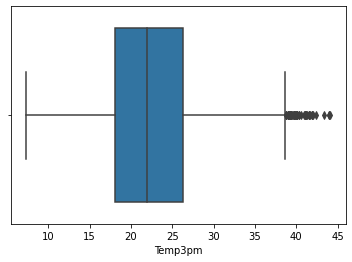

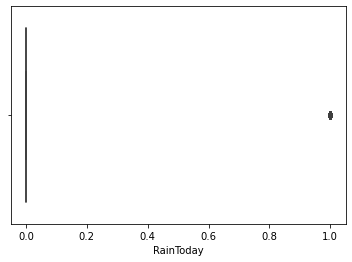

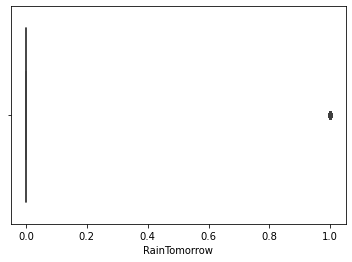

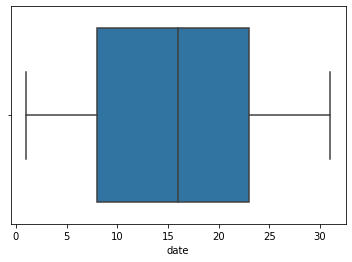

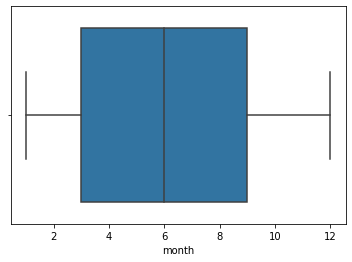

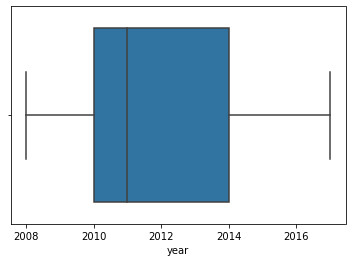

In [109]:
for col in new_df_clf:
    sns.boxplot(new_df_clf[col])
    plt.show()

In [111]:
outliers_fetures=['MaxTemp','Evaporation','Rainfall','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [112]:
score=zscore(new_df_clf[outliers_fetures])
index=(score<3).all(axis=1)
new_df_clf_cleaned=new_df_clf[index]
print(new_df_clf_cleaned.shape, new_df_clf.shape)

(7791, 25) (8186, 25)


In [113]:

data_loss=((new_df_clf.shape[0]-new_df_clf_cleaned.shape[0])/new_df_clf.shape[0])*100
data_loss

4.8253115074517465

from the above We lost 4.8% of data as part of outliers removal

# Checking Data Skewness

In [115]:
new_df_clf_cleaned.skew().sort_values()

Sunshine        -0.723861
Cloud9am        -0.343446
Humidity9am     -0.261918
Cloud3pm        -0.260579
WindDir3pm      -0.119498
MinTemp         -0.066917
Pressure9am     -0.043708
Location        -0.038613
Pressure3pm     -0.031829
Temp9am         -0.025277
date            -0.000545
month            0.061124
WindGustDir      0.112208
Humidity3pm      0.123232
WindDir9am       0.164497
WindSpeed3pm     0.306134
MaxTemp          0.326022
Temp3pm          0.339270
year             0.437531
WindGustSpeed    0.518722
WindSpeed9am     0.707726
Evaporation      0.838754
RainTomorrow     1.245104
RainToday        1.279917
Rainfall         3.482396
dtype: float64

In [116]:
skewed_features=['Sunshine','WindGustSpeed','WindSpeed9am','Evaporation','Rainfall']

In [117]:
new_df_clf_cleaned[skewed_features]=PowerTransformer().fit_transform(new_df_clf_cleaned[skewed_features])

In [118]:
new_df_clf_cleaned.skew().sort_values()

Cloud9am        -0.343446
Humidity9am     -0.261918
Cloud3pm        -0.260579
WindDir3pm      -0.119498
WindSpeed9am    -0.114742
MinTemp         -0.066917
Sunshine        -0.060886
Pressure9am     -0.043708
Location        -0.038613
Pressure3pm     -0.031829
Temp9am         -0.025277
date            -0.000545
WindGustSpeed    0.002696
month            0.061124
Evaporation      0.073709
WindGustDir      0.112208
Humidity3pm      0.123232
WindDir9am       0.164497
WindSpeed3pm     0.306134
MaxTemp          0.326022
Temp3pm          0.339270
year             0.437531
Rainfall         0.967111
RainTomorrow     1.245104
RainToday        1.279917
dtype: float64

In [119]:
new_df_clf_cleaned['Rainfall']=np.cbrt(new_df_clf_cleaned['Rainfall'])

In [120]:
new_df_clf_cleaned.skew().sort_values()

Cloud9am        -0.343446
Humidity9am     -0.261918
Cloud3pm        -0.260579
WindDir3pm      -0.119498
WindSpeed9am    -0.114742
MinTemp         -0.066917
Sunshine        -0.060886
Pressure9am     -0.043708
Location        -0.038613
Pressure3pm     -0.031829
Temp9am         -0.025277
date            -0.000545
WindGustSpeed    0.002696
month            0.061124
Evaporation      0.073709
WindGustDir      0.112208
Humidity3pm      0.123232
WindDir9am       0.164497
WindSpeed3pm     0.306134
MaxTemp          0.326022
Temp3pm          0.339270
year             0.437531
Rainfall         0.840580
RainTomorrow     1.245104
RainToday        1.279917
dtype: float64

We removed the skewness as much as possible.

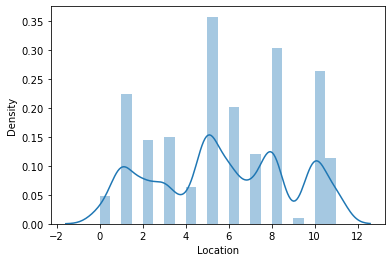

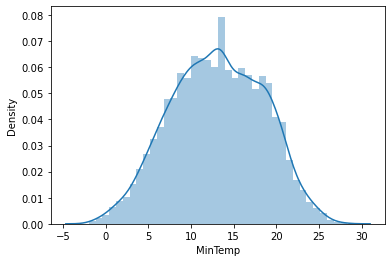

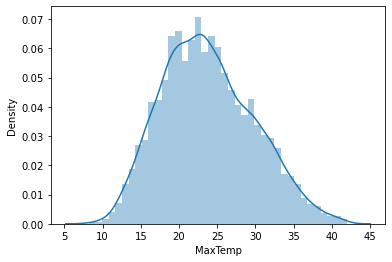

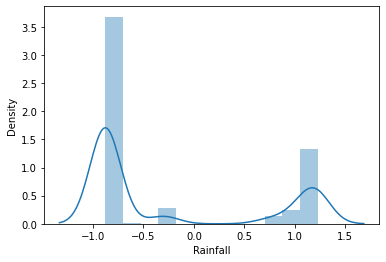

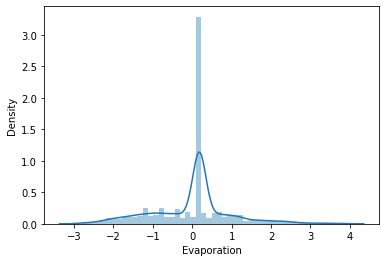

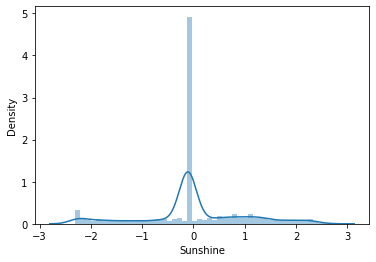

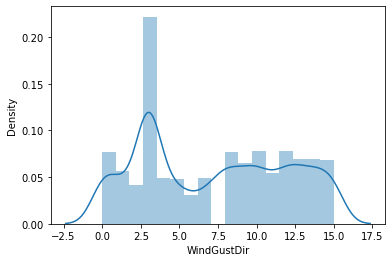

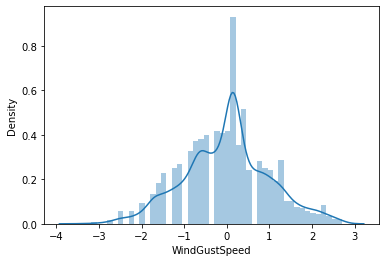

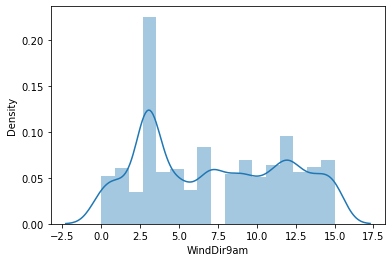

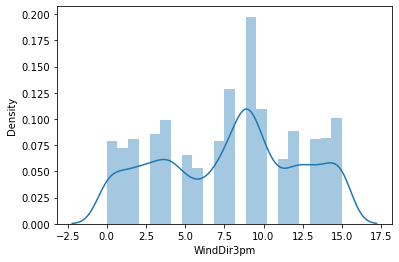

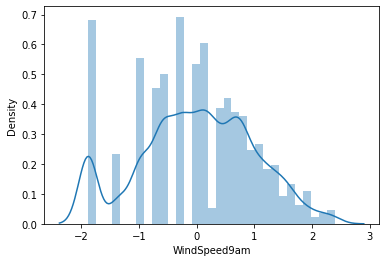

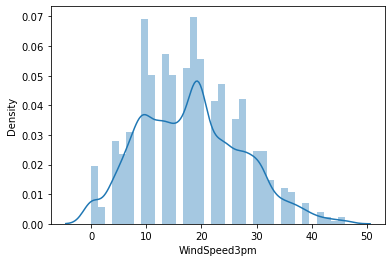

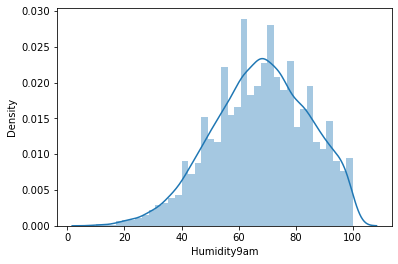

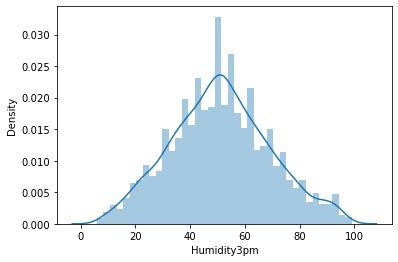

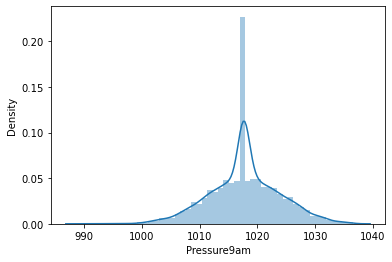

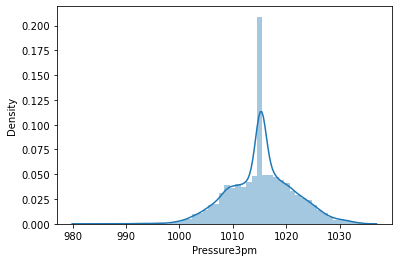

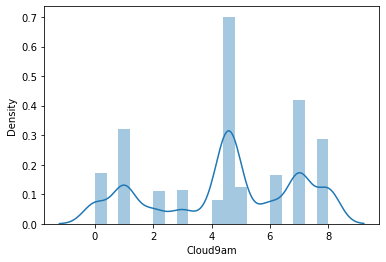

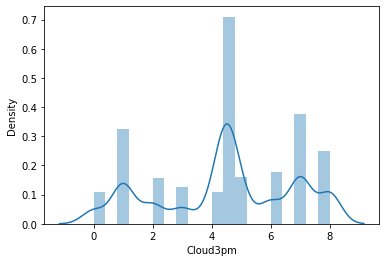

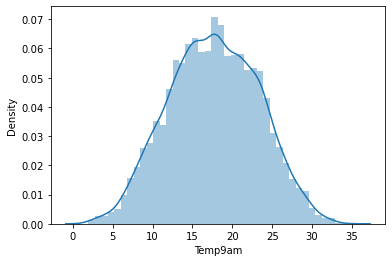

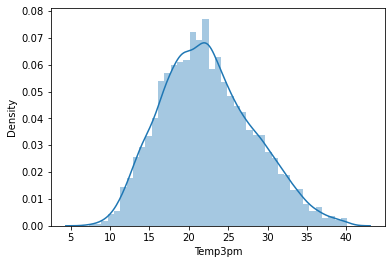

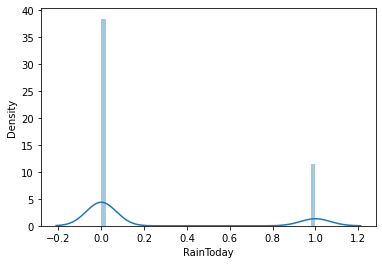

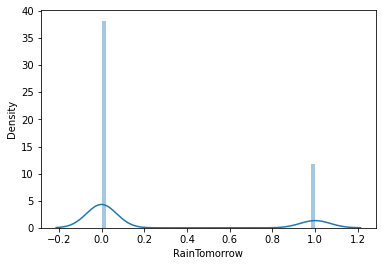

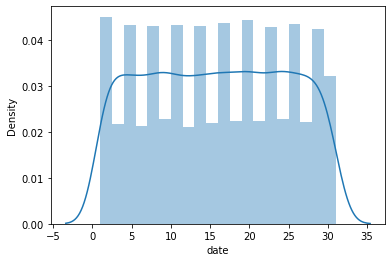

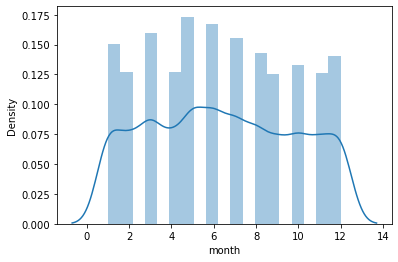

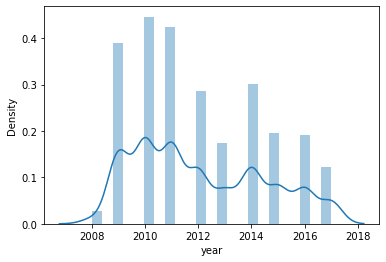

In [121]:
for col in new_df_clf_cleaned.columns:
    sns.distplot(new_df_clf_cleaned[col])
    plt.show()

# model building

In [122]:
X=new_df_cleaned.drop(['RainTomorrow'],axis=1)
y=new_df_cleaned['RainTomorrow']

In [123]:
print(X.shape,y.shape)

(7897, 24) (7897,)


In [124]:
y.value_counts()

0    6046
1    1851
Name: RainTomorrow, dtype: int64

In [125]:
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [126]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
19,32.594287,Temp3pm
2,25.951835,MaxTemp
14,20.440337,Pressure9am
15,19.419753,Pressure3pm
18,17.564733,Temp9am
1,8.954046,MinTemp
13,5.489432,Humidity3pm
3,4.843785,Rainfall
20,4.545600,RainToday
12,4.129328,Humidity9am


In [127]:
X_sc.drop(['Temp3pm'],axis=1,inplace=True)

In [128]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
14,19.831564,Pressure9am
15,18.912155,Pressure3pm
18,16.292157,Temp9am
2,9.612904,MaxTemp
1,8.902787,MinTemp
3,4.837301,Rainfall
19,4.539062,RainToday
13,3.710956,Humidity3pm
12,3.676991,Humidity9am
7,2.267976,WindGustSpeed


In [129]:
X_sc.drop(['Pressure9am'],axis=1,inplace=True)

In [130]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
17,16.236411,Temp9am
2,9.234480,MaxTemp
1,8.791949,MinTemp
3,4.827521,Rainfall
18,4.536076,RainToday
13,3.707281,Humidity3pm
12,3.676840,Humidity9am
7,2.251860,WindGustSpeed
5,2.102170,Sunshine
15,1.987933,Cloud9am


In [131]:
X_sc.drop(['Temp9am'],axis=1,inplace=True)

In [132]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
2,5.470391,MaxTemp
3,4.820533,Rainfall
1,4.585944,MinTemp
17,4.535751,RainToday
13,2.932872,Humidity3pm
12,2.611051,Humidity9am
7,2.212887,WindGustSpeed
5,2.091903,Sunshine
15,1.966518,Cloud9am
10,1.954633,WindSpeed9am


In [133]:
X_sc=StandardScaler().fit_transform(X_sc)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve
import xgboost

# Finding best Random state

In [135]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.8546835443037974 Best RS:  186


In [136]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=186)

In [137]:
y_train.value_counts()

0    4524
1    1398
Name: RainTomorrow, dtype: int64

# Applying SMOTE to balance the data.

As we have imbalanced data in out dataset, we will apply SMOTE resampling technique on our training data.

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (5922, 21) (5922,)
Training set size after applying SMOTE: (9048, 21) (9048,)


# Building base models - model selection

In [140]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svm_clf=SVC()
xgb_clf=xgb.XGBClassifier()

In [141]:
models=[lr,rf_clf,gb_clf,dt_clf,ab_clf,knn_clf,svm_clf,xgb_clf]

In [142]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')  

Metrics for  LogisticRegression()
Accuracy score:  0.8
ROC AUC Score:  0.7934880037594312
Confusion Matrix: 
 [[1226  296]
 [  99  354]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1522
           1       0.54      0.78      0.64       453

    accuracy                           0.80      1975
   macro avg       0.73      0.79      0.75      1975
weighted avg       0.84      0.80      0.81      1975
 

Metrics for  RandomForestClassifier()
Accuracy score:  0.9012658227848102
ROC AUC Score:  0.8498881743262175
Confusion Matrix: 
 [[1438   84]
 [ 111  342]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1522
           1       0.80      0.75      0.78       453

    accuracy                           0.90      1975
   macro avg       0.87      0.85      0.86      1975
weighted avg       0.90      0.90      0.90      1975


# Cross Validation

In [143]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7773875469973787
For Model  RandomForestClassifier()
Mean Accuracy:  0.8581800691031818
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.8166417617303052
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7834731964630715
For Model  AdaBoostClassifier()
Mean Accuracy:  0.8005637280445083
For Model  KNeighborsClassifier()
Mean Accuracy:  0.7472512646202933
For Model  SVC()
Mean Accuracy:  0.8099305761537907
For Model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, 

# Plotting ROC AUC Curve

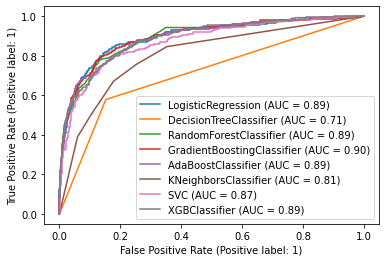

In [144]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(svm_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(xgb_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

Based on the base model score, cross validation score and AUC score RandomForestClassifier works well for our dataset.

# Final model - RandomForestClassifier

# Hyper Parameter tuning

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
param={'criterion':["gini", "entropy"],
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130,150,170]}
#param={'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.1,0.5,1],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[90,100,130]}
grd_srch=GridSearchCV(RandomForestClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=150)
0.9280549371008675


Finding best Random state

In [147]:
m_acc=0
b_rs=0
for i in range(1,20):
    final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.9772007599746675 Best RS:  14
0.9772007599746675
0.9595279335752777
[[1282   17]
 [  19  261]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1299
           1       0.94      0.93      0.94       280

    accuracy                           0.98      1579
   macro avg       0.96      0.96      0.96      1579
weighted avg       0.98      0.98      0.98      1579



In [148]:
final_model=RandomForestClassifier(max_features='sqrt', n_estimators=130,random_state=15)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.974034198860038
ROC AUC Score:  0.9576033762234686
Confusion Matrix: 
 [[1277   22]
 [  19  261]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1299
           1       0.92      0.93      0.93       280

    accuracy                           0.97      1579
   macro avg       0.95      0.96      0.96      1579
weighted avg       0.97      0.97      0.97      1579



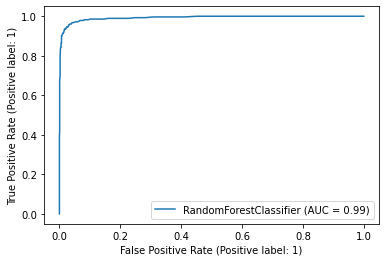

In [149]:
plot_roc_curve(final_model,X_test,y_test)

We able to build a final model with 98% of test accuracy and 99% of AUC score.

# MODEL SAVING

In [151]:
import pickle
pickle.dump(final_model,open('RainfallPrediction_clf.pkl','wb'))

In [152]:
final_model=pickle.load(open('RainfallPrediction_clf.pkl','rb'))

prediction

In [153]:
prediction = pd.DataFrame([final_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])
prediction

,0,1,2,3,4,5,6,7,8,9,...,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578
Predicted,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
